<img style="margin: 2rem 0 0;" src="https://plotly-marketing-website.cdn.prismic.io/plotly-marketing-website/948b6663-9429-4bd6-a4cc-cb33231d4532_logo-plotly.svg" width="15%" />

# Aula 10 - Plotly
---

<img src="https://lc-public-assets.s3.sa-east-1.amazonaws.com/images/Logos/logoLcPng.webp" width="300px" style="position: absolute; top: 2.2rem; right: 20px; border-radius: 5px;" />

A biblioteca Plotly é uma biblioteca do Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, cobrindo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

Construído sobre a biblioteca Plotly JavaScript (plotly.js), o plotly permite que os usuários Python criem belas visualizações interativas baseadas na web que podem ser exibidas em blocos de anotações Jupyter, salvas em arquivos HTML autônomos ou servidas como parte da web puramente construída em Python aplicativos usando o Dash. A biblioteca Plotly do Python é às vezes chamada de "plotly.py" para diferenciá-la da biblioteca JavaScript.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/4f93ab61-2342-4cfe-af1b-1de1a7e87ff4.gif" alt="Plotly examples" style="display: block; margin: 2rem 0; max-width: 700px" />

In [1]:
!pip install -U plotly

Requirement already up-to-date: plotly in /home/walisson/.local/lib/python3.8/site-packages (5.1.0)


In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

pio.templates.default = 'plotly_dark'

In [3]:
df = pd.read_csv('../datasets/life_expectancy.csv')

In [4]:
df.head()

,Unnamed: 0,Year,Life Expectancy,Country
0,0,1950,49.56,Brazil
1,1,1951,49.98,Brazil
2,2,1952,50.41,Brazil
3,3,1953,50.83,Brazil
4,4,1954,51.25,Brazil


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_brasil = df[df['Country'] == 'Brazil']
df_eua = df[df['Country'] == 'EUA']

## Gráfico de Linha

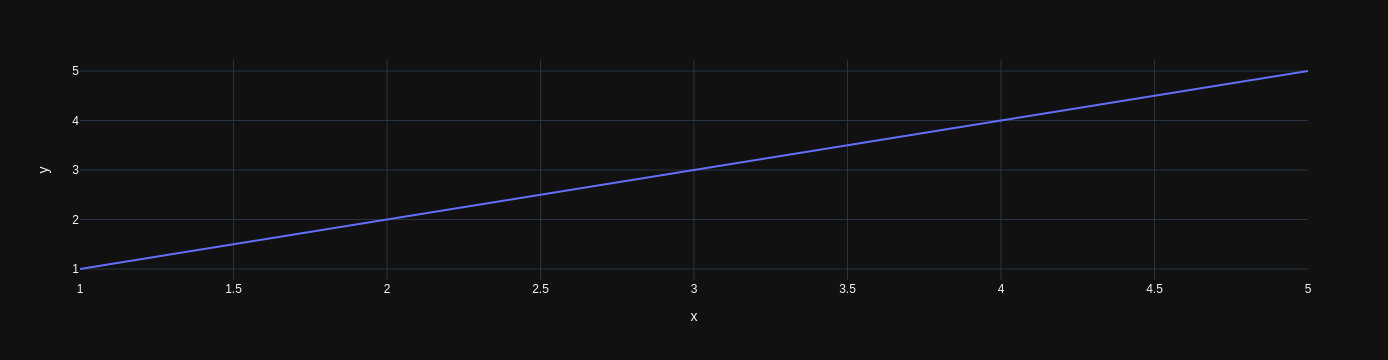

In [15]:
px.line(x=[1, 2, 3, 4, 5], y=[1, 2, 3, 4, 5])

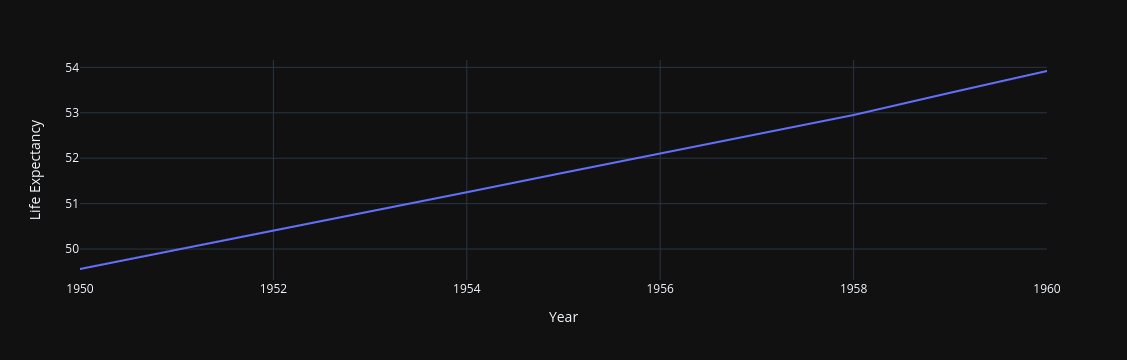

In [18]:
fig = px.line(df_brasil, x='Year', y='Life Expectancy')

fig.show()

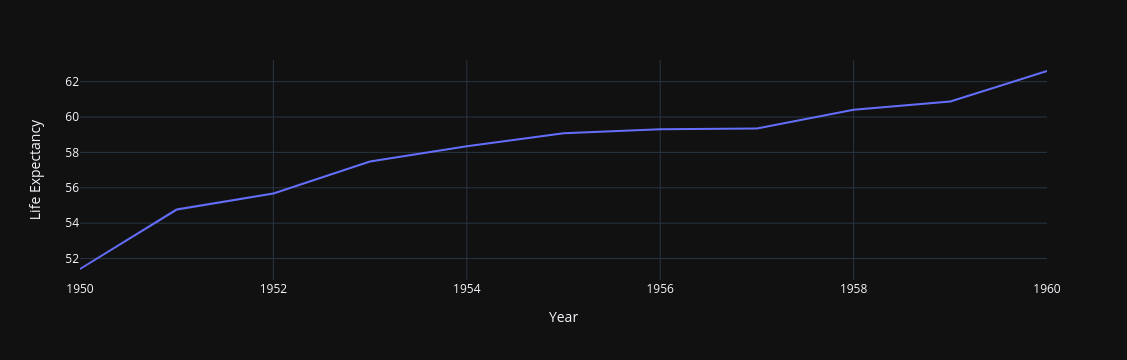

In [19]:
px.line(df_eua, x='Year', y='Life Expectancy')

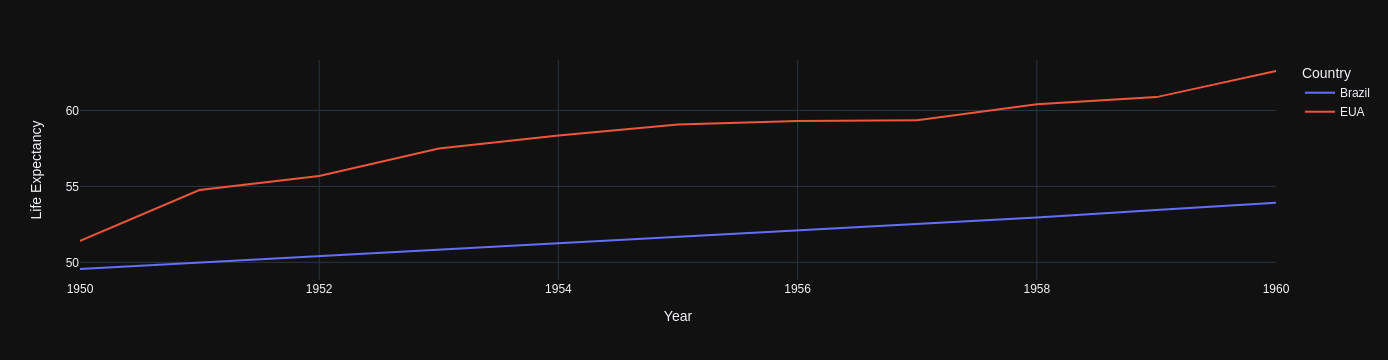

In [16]:
px.line(df, x='Year', y='Life Expectancy', color='Country')

## Gráfico de Dispersão

In [20]:
import seaborn as sns

In [21]:
iris = sns.load_dataset('iris')

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


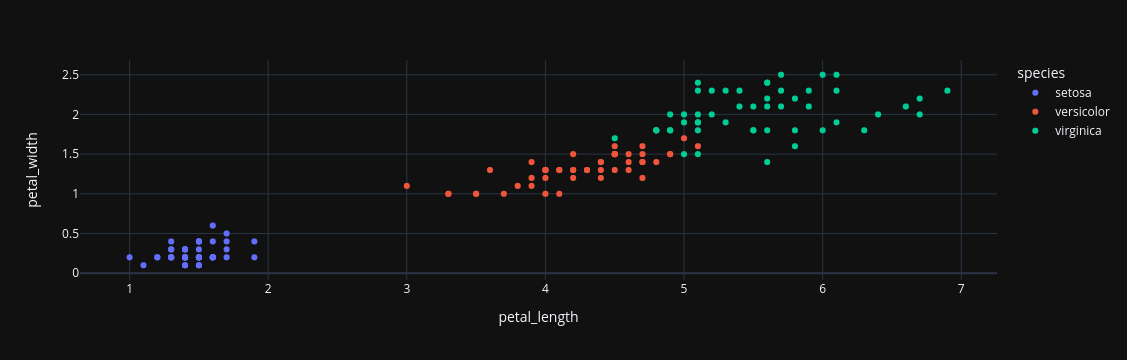

In [24]:
px.scatter(iris, x='petal_length', y='petal_width', color='species')

## Gráfico de Barras

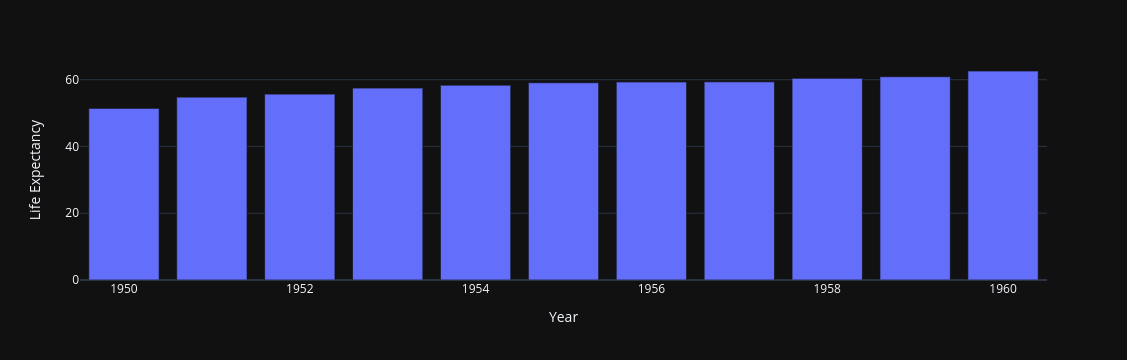

In [25]:
px.bar(df_eua, x='Year', y='Life Expectancy')

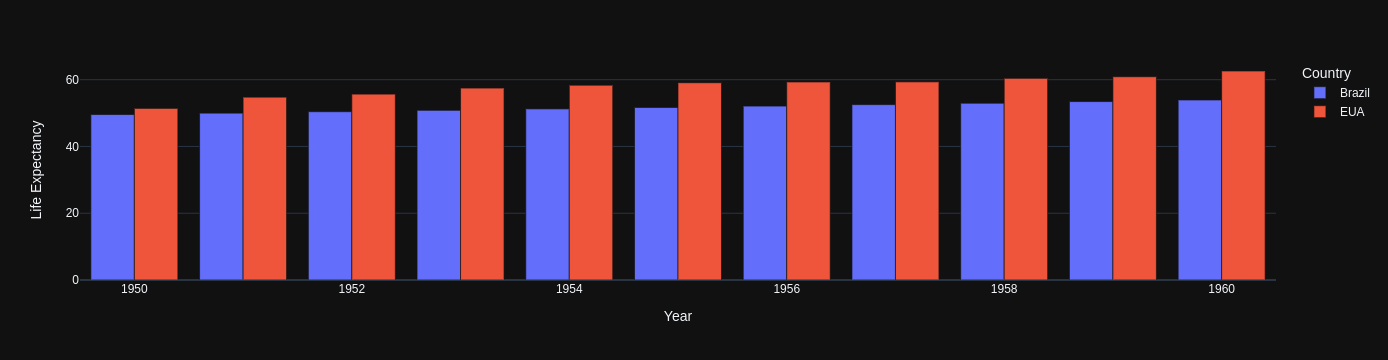

In [29]:
px.bar(df, x='Year', y='Life Expectancy', color='Country', barmode='group')

## Boxplot

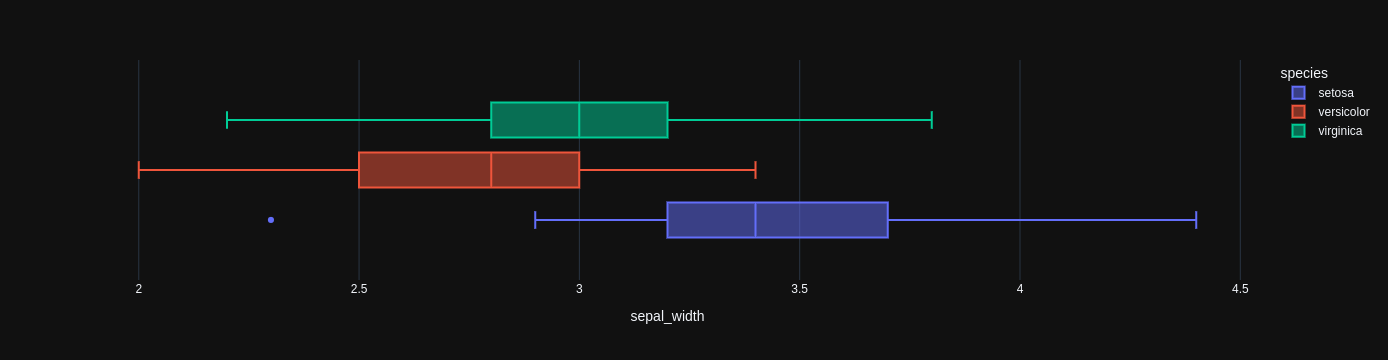

In [33]:
px.box(iris, x='sepal_width', color='species')

## Dash
---

In [35]:
!pip install dash

In [36]:
!pip install jupyter-dash

In [38]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash

import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(mode='inline', port=5000)

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

fig = px.bar(df, x='State', y='Population')

In [44]:
from dash.dependencies import Input, Output

external_stylesheets = ['https://codepen.io/anon/pen/mardKv.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Graph(figure=fig, id='graph'),
    html.P(id='paragraph', children='Opa', style={'color': 'white', 'margin-top': '2rem', 'text-align': 'center'}),
    dcc.Slider(
        id='slider',
        min=1,
        max=52,
        step=1,
        value=52,
        marks={
            1: '1',
            52: f"{52}"
        },
        dots=False
    ),
    dcc.Input(),
    dcc.Markdown('''
        ## Subtítulo
        
        Isso aqui é um parágrafo.
    ''')
])

@app.callback(
    Output(component_id='paragraph', component_property='children'),
    Output(component_id='graph', component_property='figure'),
    Input(component_id='slider', component_property='value')
)
def handle_slider(value):
    df_filtered = df[df['Rank'] < value]
    fig = px.bar(df_filtered, x='State', y='Population')
    return (value, fig)

app.run_server(mode='inline', port=5001)